In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import sys
sys.path.append("../")

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import math


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importar nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_clustering as sc

# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('../data/Global_Superstore.csv', encoding='ISO-8859-1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [3]:
# instanciamos la clase de Exploración de datos antes de aplicar el algoritmo
preprocesar = sc.Exploracion(df)

# llamamos al método de exploración de datos
preprocesar.explorar_datos()

5 registros aleatorios:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
40992,48370,TU-2014-7090,26-09-2014,30-09-2014,Standard Class,BF-1020,Barry Französisch,Corporate,Ankara,Ankara,Turkey,NaN,EMEA,EMEA,OFF-FIS-10002784,Office Supplies,Supplies,"Fiskars Box Cutter, High Speed",28.416,2,0.6,-17.784,2.03,Medium
37349,12115,ES-2011-4993136,11-03-2011,15-03-2011,Standard Class,PO-18865,Patrick O'Donnell,Consumer,Pessac,Aquitaine,France,NaN,EU,Central,OFF-AR-10002991,Office Supplies,Art,"Binney & Smith Markers, Blue",72.270,3,0.0,13.680,2.91,Medium
28204,5524,MX-2012-147053,30-06-2012,05-07-2012,Second Class,HD-14785,Harold Dahlen,Home Office,Portmore,Saint Catherine,Jamaica,NaN,LATAM,Caribbean,FUR-CH-10002291,Furniture,Chairs,"Hon Bag Chairs, Set of Two",126.400,4,0.0,36.640,6.36,Medium
14645,42832,IZ-2012-1710,17-01-2012,22-01-2012,Standard Class,CP-2340,Christine Phan,Corporate,Baghdad,Baghdad,Iraq,NaN,EMEA,EMEA,TEC-EPS-10004328,Technology,Machines,"Epson Printer, Durable",262.740,1,0.0,99.840,20.37,Medium
48501,19936,IT-2011-1320928,16-11-2011,23-11-2011,Standard Class,RP-19270,Rachel Payne,Corporate,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-BI-10004903,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",4.245,1,0.5,-1.875,0.64,Low




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994




Número de valores nulos por columna:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Distribución de valores categóricos:

Columna: Order ID
Order ID
CA-2014-100111     14
IN-2012-41261      13
TO-2014-9950       13
IN-2013-42311      13
NI-2014-8880       13
                   ..
ES-2013-1579342     1
MX-2012-134460      1
IN-2013-34366       1
US-2011-152723      1
CA-2012-162544      1
Name: count, Length: 25035, dtype: int64

Columna: Order Date
O

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


In [4]:
df.drop(columns=['Row ID','Postal Code','Customer ID','Customer Name','Ship Date','Order Date','Order ID'],inplace=True)

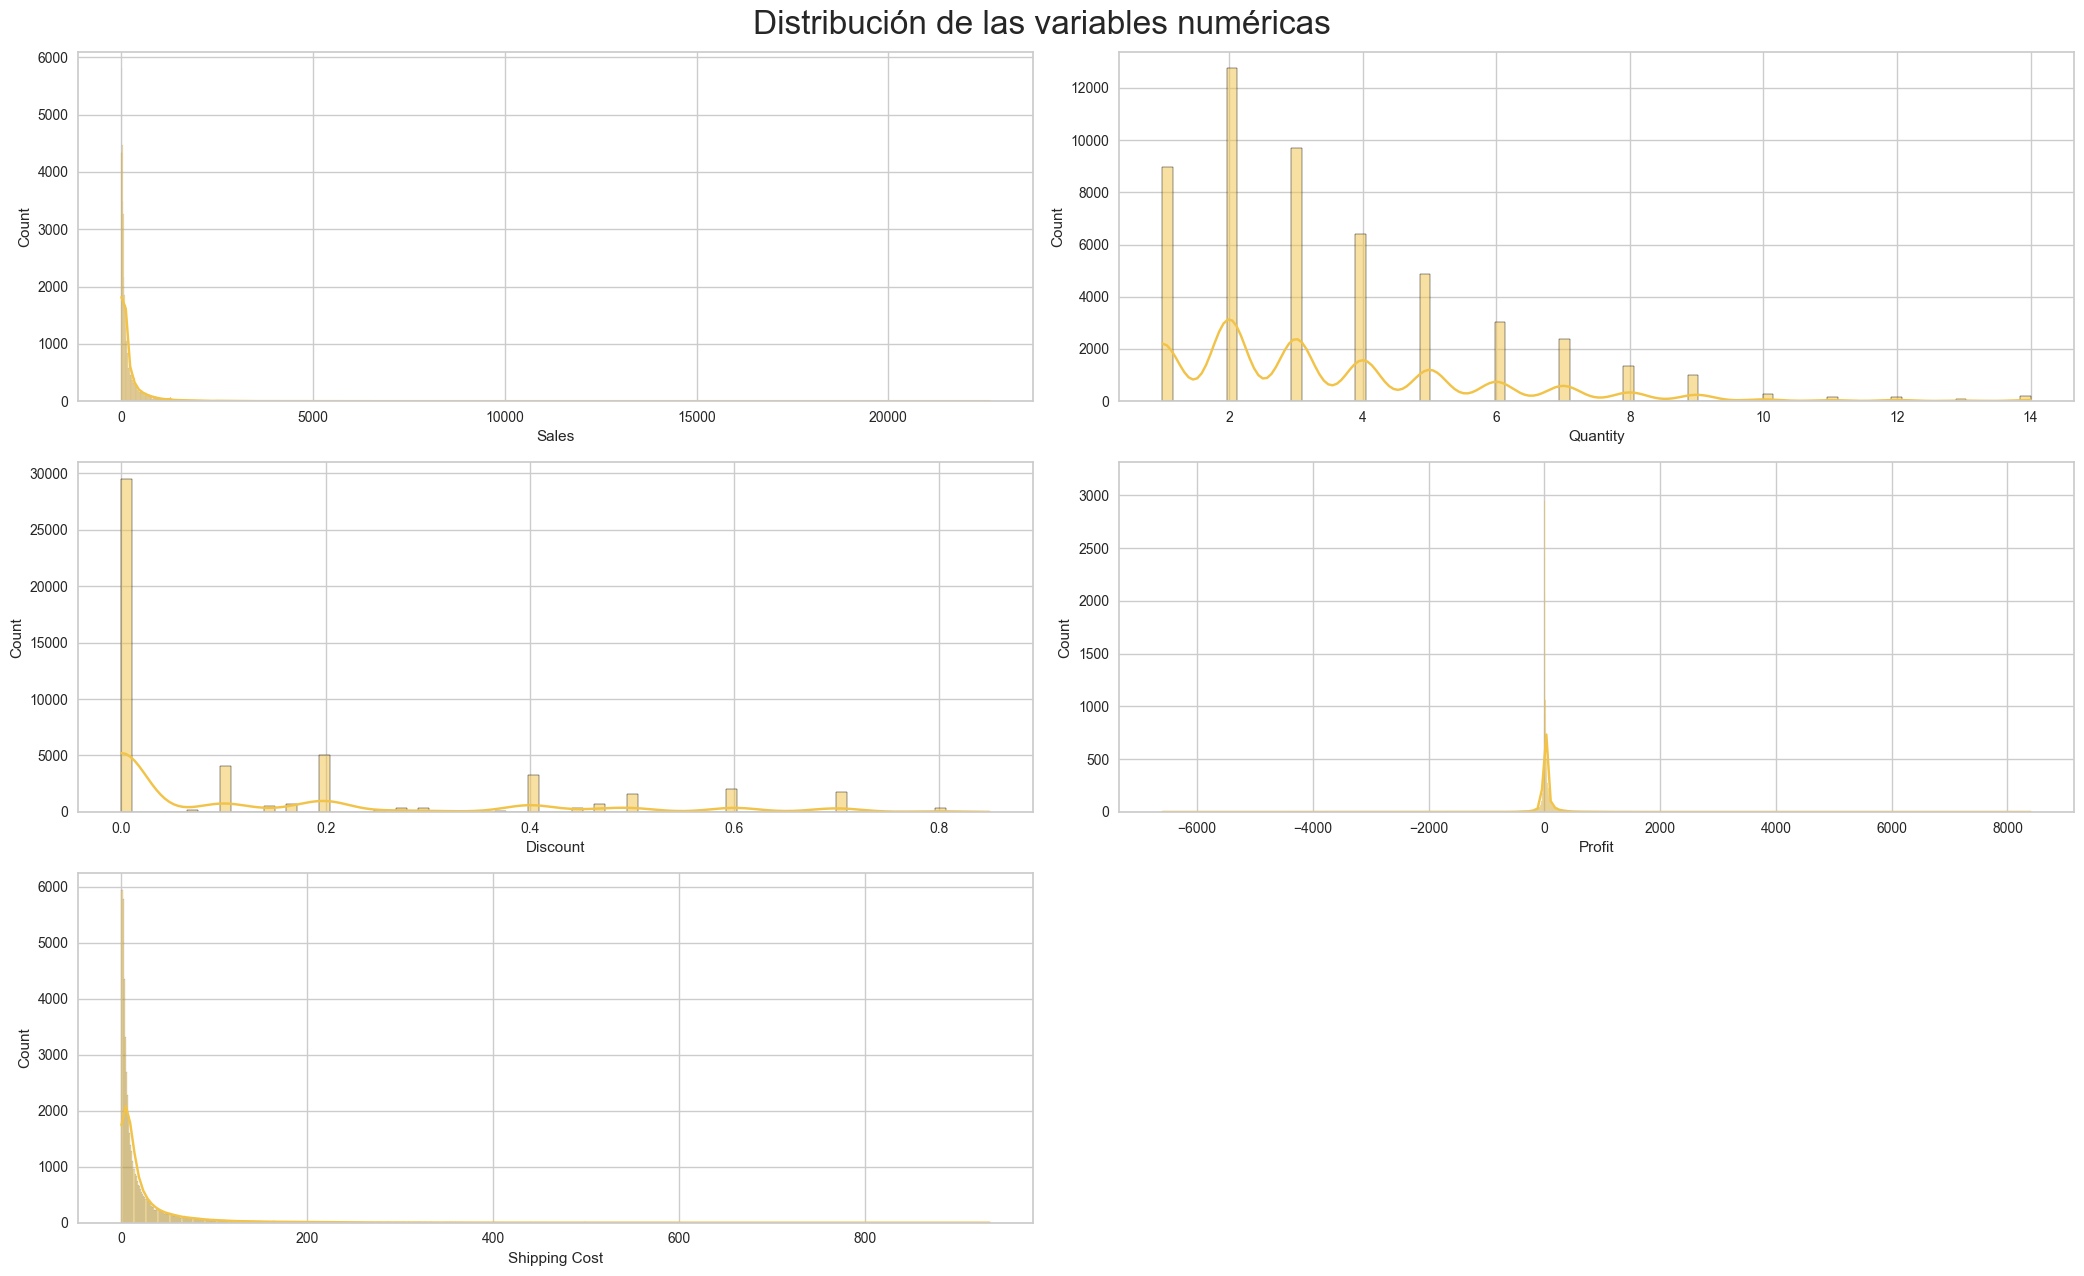

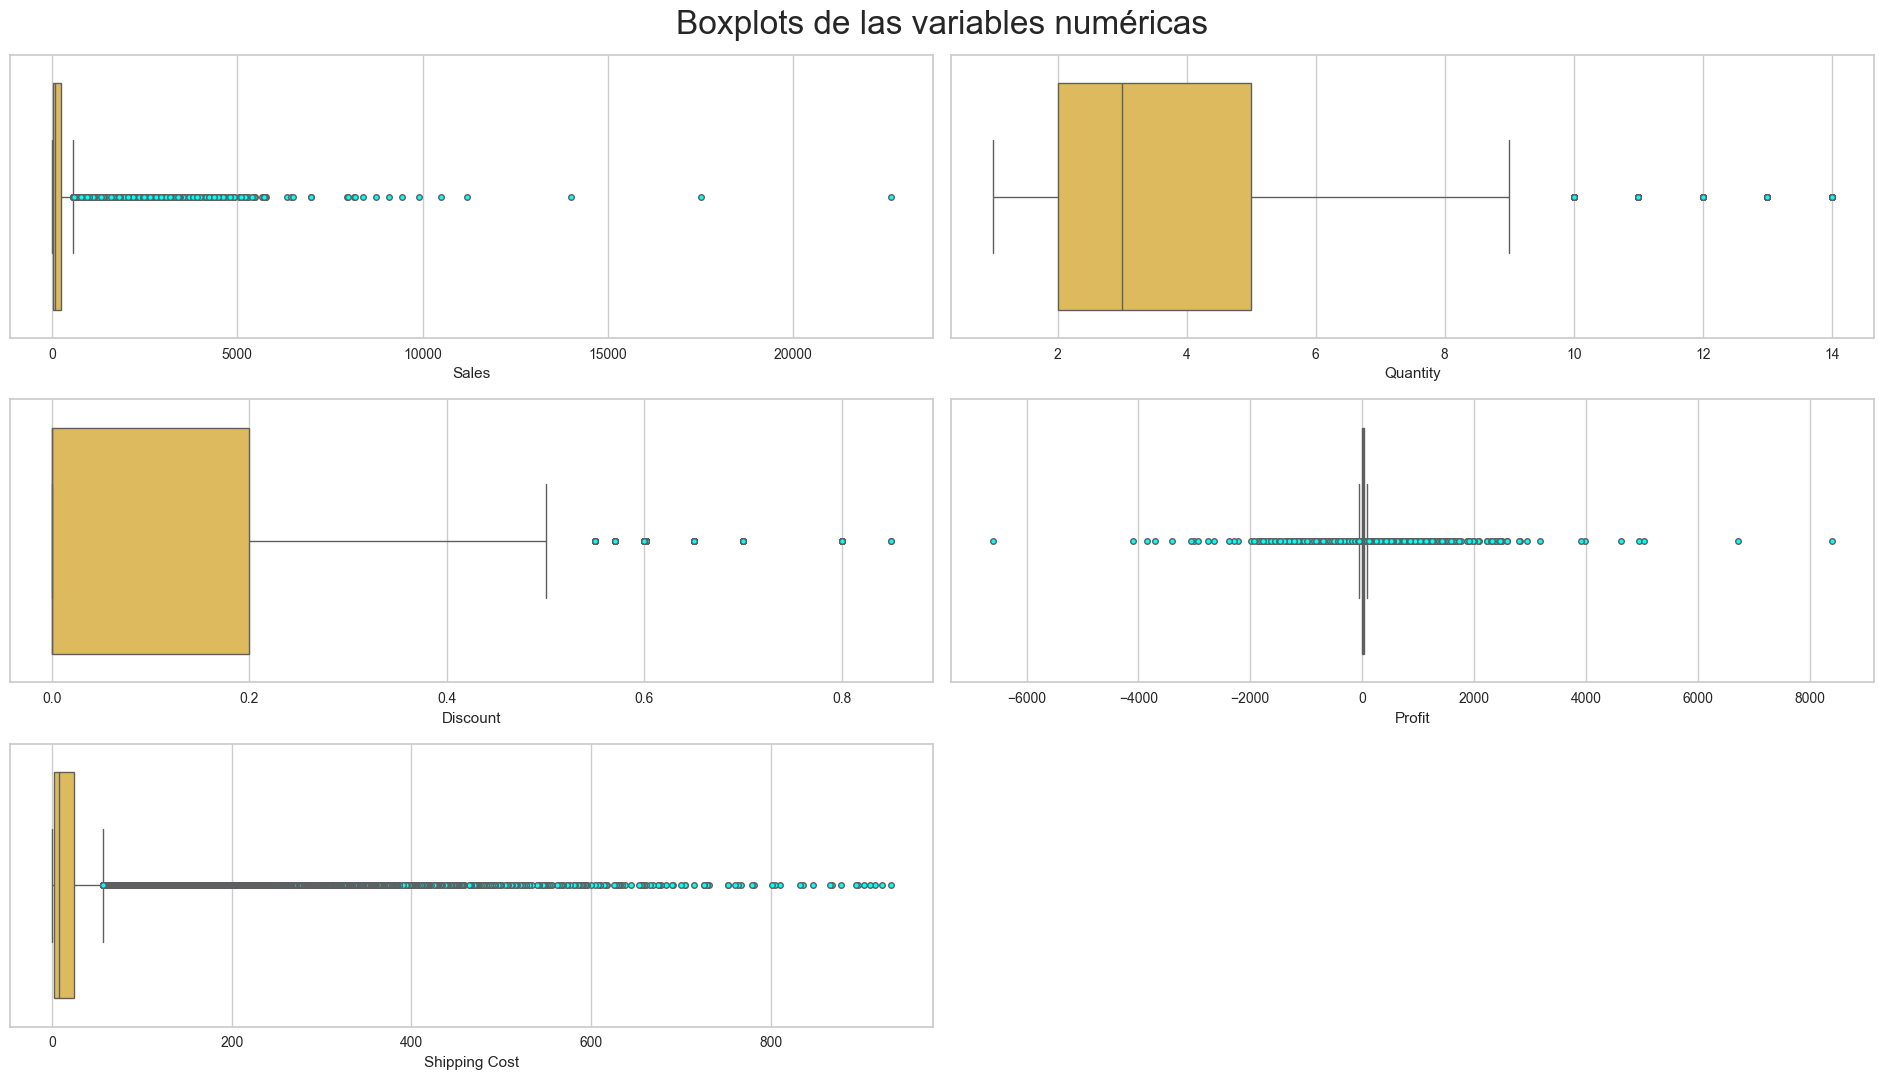

In [5]:
preprocesar.visualizar_numericas()

In [6]:
#preprocesar.visualizar_categoricas_numericas()

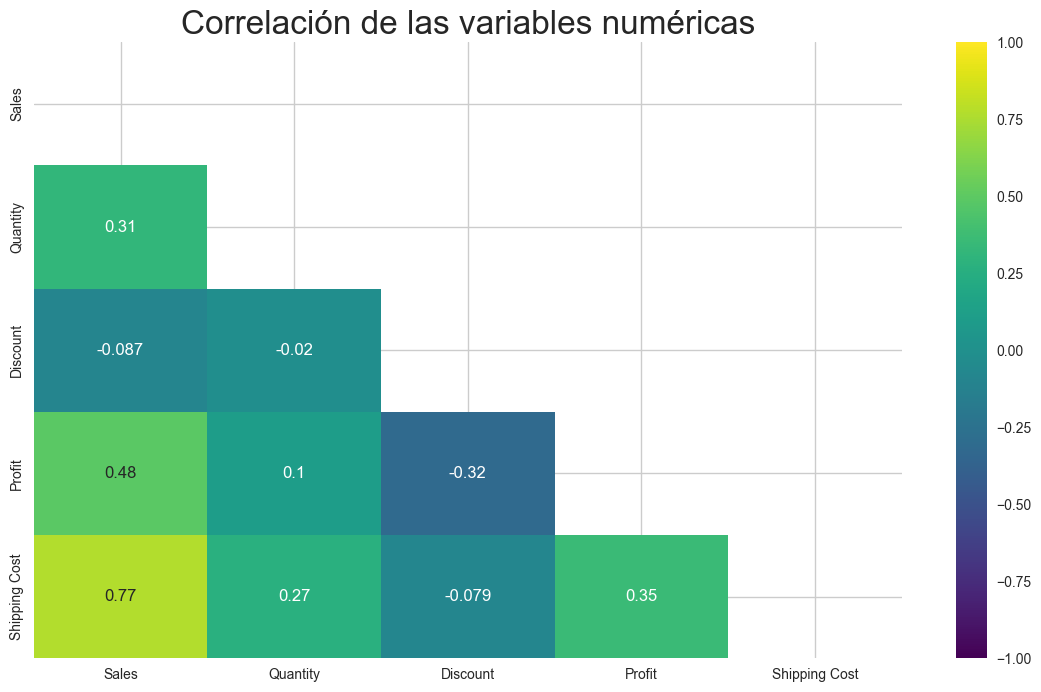

In [7]:
# evaluamos la correlación entre las variables numéricas
preprocesar.correlacion()

In [8]:
df.head(2)

,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Same Day,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [9]:
# instanciamos la clase de Preprocesado de datos antes de aplicar el algoritmo
preprocesar = sc.Preprocesado(df)

# estandarizamos los datos
df = preprocesar.estandarizar()
# chequeamos que se estandarizó correctamente

In [10]:
df = preprocesar.codificar()

In [11]:
df.head()

,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662
1,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662
2,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855
3,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855
4,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662


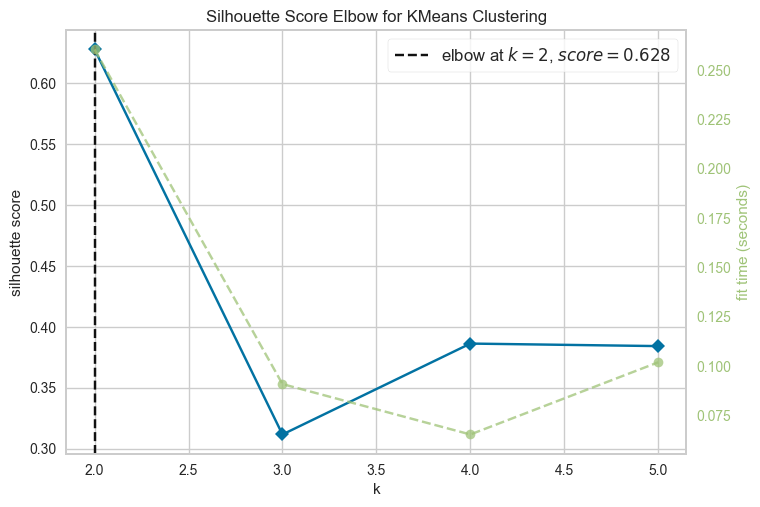

In [12]:
# instanciamos la clase de clustering
modelos = sc.Clustering(df)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()

In [13]:
# aplicamos el modelo de Kmeans al dataframe 
df, labels  = modelos.modelo_kmeans(df, 3)

# mostramos el DataFrame
df.head()

,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662,2
1,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662,2
2,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855,2
3,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855,2
4,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662,2


In [14]:
df["clusters_kmeans"].unique()

array(['2', '1', '0'], dtype=object)

In [15]:
modelos.calcular_metricas(labels=labels)

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.362836,1.227298,35603


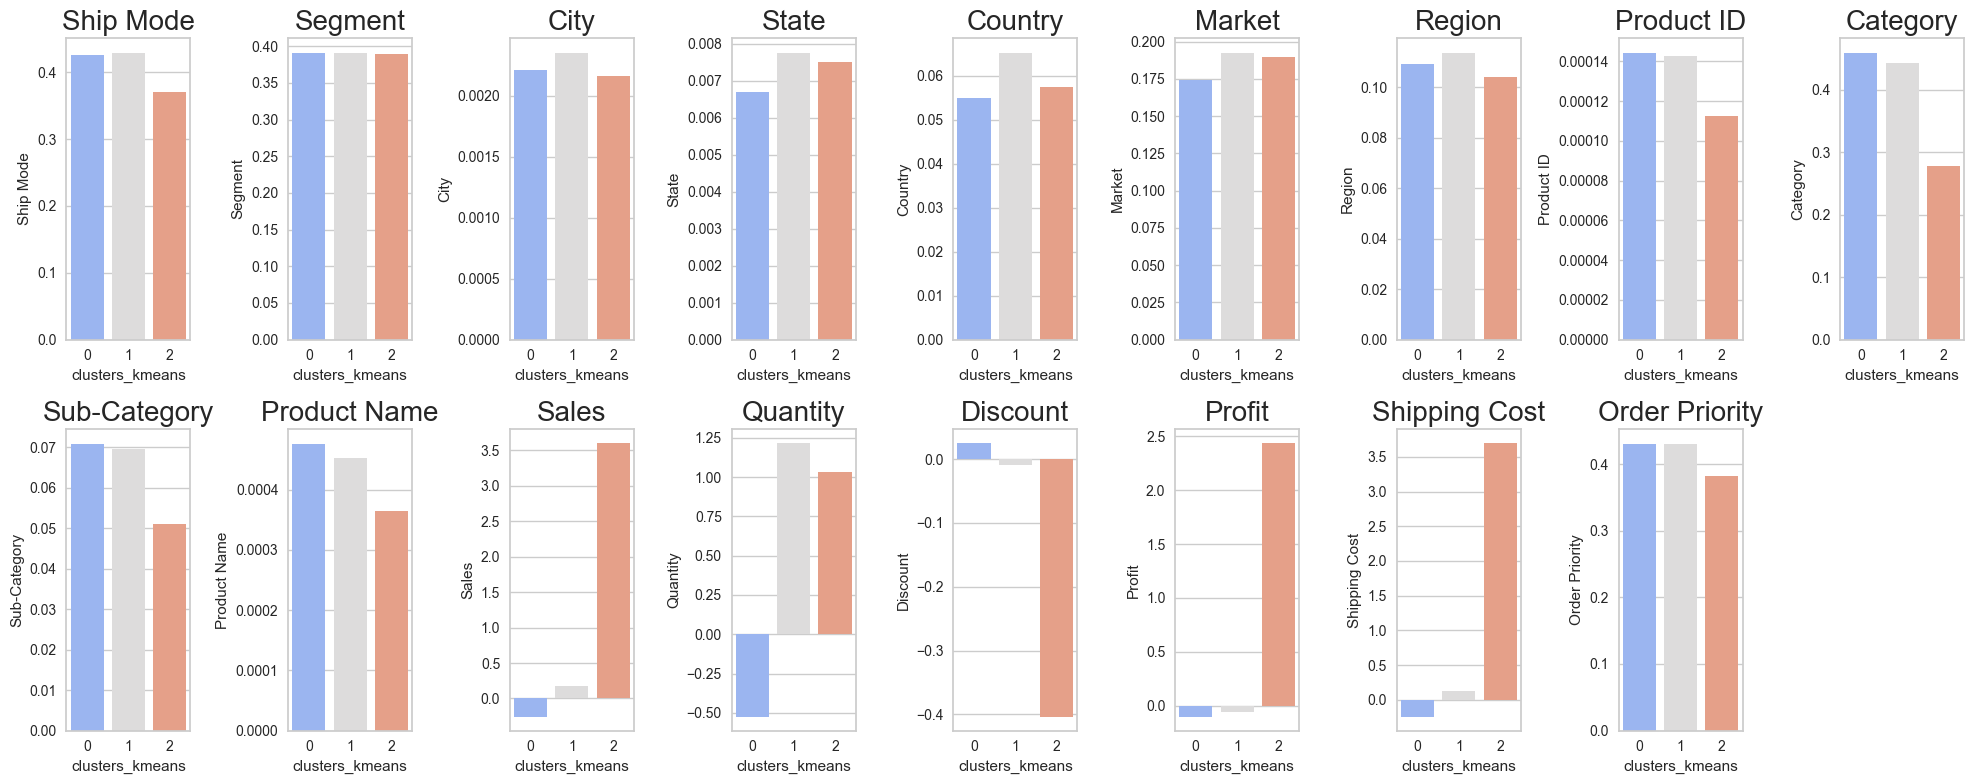

In [16]:
#Eliminar la columna "clusters_kmeans" para el plot
columnas_plot = df.columns.drop(["clusters_kmeans"])

#Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

#Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

In [17]:
# 10 veces con 1000 datos cada uno.
for seq in range(10):
    test = pd.DataFrame(df.sample(1000))
    result_df = sc.mejor_cluster_AgglomerativeClustering(test)
    display(result_df)

,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
14,single,chebyshev,0.842500,0.108843,"{0: 998, 1: 1, 2: 1}",3
56,average,chebyshev,0.834496,0.764651,"{0: 2, 1: 1, 2: 997}",3
15,single,chebyshev,0.813675,0.125699,"{0: 997, 1: 1, 2: 1, 3: 1}",4
57,average,chebyshev,0.813675,0.125699,"{0: 997, 1: 1, 2: 1, 3: 1}",4
0,single,euclidean,0.810584,0.108843,"{0: 998, 1: 1, 2: 1}",3


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
35,complete,chebyshev,0.852550,0.260896,"{0: 995, 1: 4, 2: 1}",3
14,single,chebyshev,0.852550,0.260896,"{0: 995, 1: 1, 2: 4}",3
56,average,chebyshev,0.845589,0.310322,"{0: 994, 1: 1, 2: 5}",3
21,complete,euclidean,0.830803,0.260896,"{0: 995, 1: 1, 2: 4}",3
42,average,euclidean,0.806829,0.472581,"{0: 7, 1: 1, 2: 992}",3


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
0,single,euclidean,0.896188,0.064988,"{0: 998, 1: 1, 2: 1}",3
14,single,chebyshev,0.894841,0.064988,"{0: 998, 1: 1, 2: 1}",3
56,average,chebyshev,0.879796,0.280405,"{0: 2, 1: 997, 2: 1}",3
57,average,chebyshev,0.878465,0.078906,"{0: 997, 1: 1, 2: 1, 3: 1}",4
15,single,chebyshev,0.878465,0.078906,"{0: 997, 1: 1, 2: 1, 3: 1}",4


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
0,single,euclidean,0.836211,0.109778,"{0: 998, 1: 1, 2: 1}",3
42,average,euclidean,0.836211,0.109778,"{0: 998, 1: 1, 2: 1}",3
14,single,chebyshev,0.825689,0.109778,"{0: 998, 1: 1, 2: 1}",3
56,average,chebyshev,0.825689,0.109778,"{0: 998, 1: 1, 2: 1}",3
1,single,euclidean,0.751061,0.141455,"{0: 997, 1: 1, 2: 1, 3: 1}",4


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
0,single,euclidean,0.794540,0.126181,"{0: 998, 1: 1, 2: 1}",3
42,average,euclidean,0.794540,0.126181,"{0: 998, 1: 1, 2: 1}",3
1,single,euclidean,0.791016,0.247617,"{0: 996, 1: 2, 2: 1, 3: 1}",4
56,average,chebyshev,0.774988,0.462640,"{0: 6, 1: 993, 2: 1}",3
15,single,chebyshev,0.772488,0.247617,"{0: 996, 1: 2, 2: 1, 3: 1}",4


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
14,single,chebyshev,0.813593,0.193287,"{0: 997, 1: 1, 2: 2}",3
0,single,euclidean,0.812942,0.193287,"{0: 997, 1: 1, 2: 2}",3
21,complete,euclidean,0.812942,0.193287,"{0: 997, 1: 2, 2: 1}",3
42,average,euclidean,0.812942,0.193287,"{0: 997, 1: 1, 2: 2}",3
15,single,chebyshev,0.753597,0.187163,"{0: 2, 1: 996, 2: 1, 3: 1}",4


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
0,single,euclidean,0.790147,0.259099,"{0: 997, 1: 1, 2: 2}",3
15,single,chebyshev,0.786636,0.412508,"{0: 995, 1: 2, 2: 2, 3: 1}",4
14,single,chebyshev,0.785357,0.259099,"{0: 997, 1: 1, 2: 2}",3
42,average,euclidean,0.781614,0.549867,"{0: 995, 1: 3, 2: 2}",3
1,single,euclidean,0.780795,0.412508,"{0: 2, 1: 995, 2: 2, 3: 1}",4


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
56,average,chebyshev,0.890741,0.080793,"{0: 998, 1: 1, 2: 1}",3
14,single,chebyshev,0.890741,0.080793,"{0: 998, 1: 1, 2: 1}",3
0,single,euclidean,0.873969,0.080793,"{0: 998, 1: 1, 2: 1}",3
15,single,chebyshev,0.792052,0.114361,"{0: 997, 1: 1, 2: 1, 3: 1}",4
1,single,euclidean,0.780521,0.114361,"{0: 997, 1: 1, 2: 1, 3: 1}",4


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
56,average,chebyshev,0.854260,0.108867,"{0: 998, 1: 1, 2: 1}",3
14,single,chebyshev,0.854260,0.108867,"{0: 998, 1: 1, 2: 1}",3
0,single,euclidean,0.819650,0.108867,"{0: 998, 1: 1, 2: 1}",3
15,single,chebyshev,0.816963,0.106941,"{0: 997, 1: 1, 2: 1, 3: 1}",4
1,single,euclidean,0.813615,0.106941,"{0: 997, 1: 1, 2: 1, 3: 1}",4


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
14,single,chebyshev,0.803655,0.137387,"{0: 998, 1: 1, 2: 1}",3
15,single,chebyshev,0.797221,0.133467,"{0: 997, 1: 1, 2: 1, 3: 1}",4
0,single,euclidean,0.790304,0.137387,"{0: 998, 1: 1, 2: 1}",3
1,single,euclidean,0.789382,0.133467,"{0: 997, 1: 1, 2: 1, 3: 1}",4
2,single,euclidean,0.787014,0.133362,"{0: 996, 1: 1, 2: 1, 3: 1, 4: 1}",5


In [18]:
# aplicamos el modelo para sacar los clusters
df = modelos.modelo_aglomerativo(3, "average", df, "chebyshev")

In [19]:
df.head()

,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans,clusters_agglomerative
0,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662,2,0
1,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662,2,0
2,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855,2,0
3,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855,2,0
4,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662,2,0


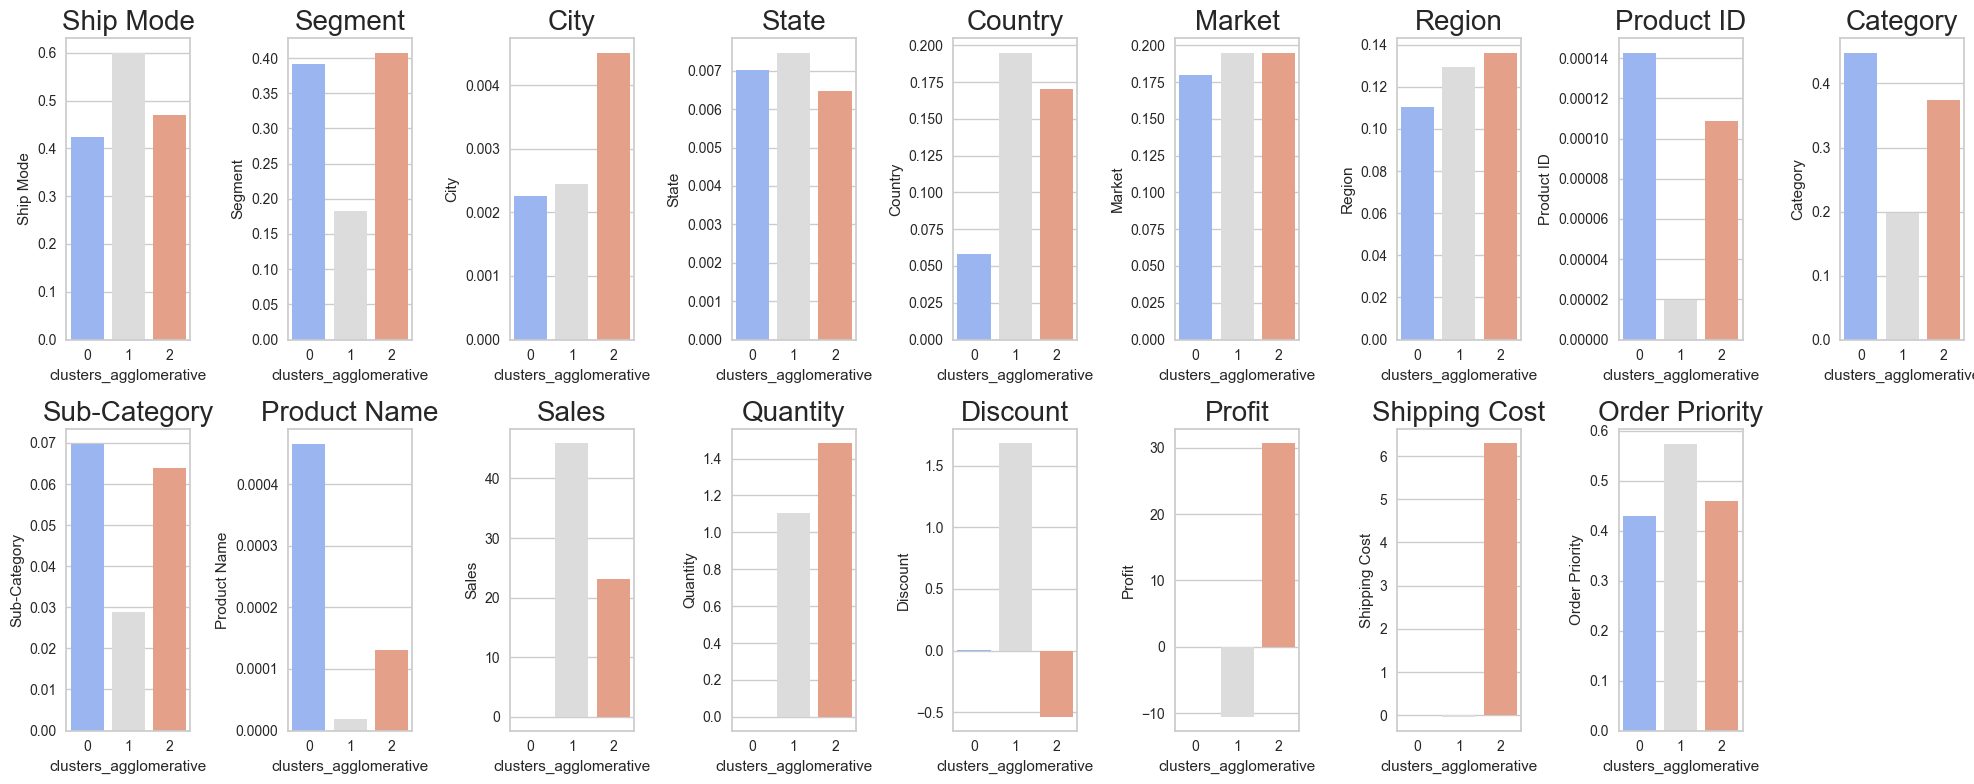

In [20]:
#Eliminar la columna "clusters_kmeans" para el plot
columnas_plot = df.columns.drop(["clusters_agglomerative","clusters_kmeans"])

#Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_agglomerative")[columna].mean().reset_index()
    sns.barplot(x="clusters_agglomerative", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

#Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

In [21]:
df.shape[0]

51290

In [22]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'clusters_kmeans', 'clusters_agglomerative'],
      dtype='object')

In [23]:
df_orig = pd.read_csv('../data/Global_Superstore.csv', encoding='ISO-8859-1')
df_orig.shape[0]

51290

In [24]:
df_orig.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [25]:
df["Sales_respuesta"] = df_orig["Sales"]

In [26]:
df.drop(columns=["Sales"], inplace=True)

In [27]:
df.head(3)

,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans,clusters_agglomerative,Sales_respuesta
0,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,1.546227,-0.673210,4.207735,15.833395,0.076662,2,0,2309.650
1,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,2.423903,-0.202129,-1.820450,15.659911,0.076662,2,0,3709.395
2,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,2.423903,-0.202129,5.112790,15.517842,0.573855,2,0,5175.171


In [28]:
df.to_csv('../data/Global_Superstore_clustering.csv', encoding='ISO-8859-1')